# Часть 1


1. Загрузка и подготовка датасета MNIST

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

2. Построение полносвязной нейронной сети

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

3. Компиляция модели

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

4. Обучение модели

In [ ]:
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8777 - loss: 0.4160 - val_accuracy: 0.9674 - val_loss: 0.1103
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9692 - loss: 0.1034 - val_accuracy: 0.9664 - val_loss: 0.1099
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9783 - loss: 0.0693 - val_accuracy: 0.9758 - val_loss: 0.0821
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9842 - loss: 0.0510 - val_accuracy: 0.9718 - val_loss: 0.0894
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9875 - loss: 0.0390 - val_accuracy: 0.9786 - val_loss: 0.0768
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9899 - loss: 0.0323 - val_accuracy: 0.9774 - val_loss: 0.0804
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9927 - loss: 0.0232 - val_accuracy: 0.9774 - val_loss: 0.0876
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9924 - loss: 0.

5. Оценка модели на тестовых данных

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'\nТочность на тестовых данных: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1316

Точность на тестовых данных: 0.9763


6. Построение графиков потерь и точности

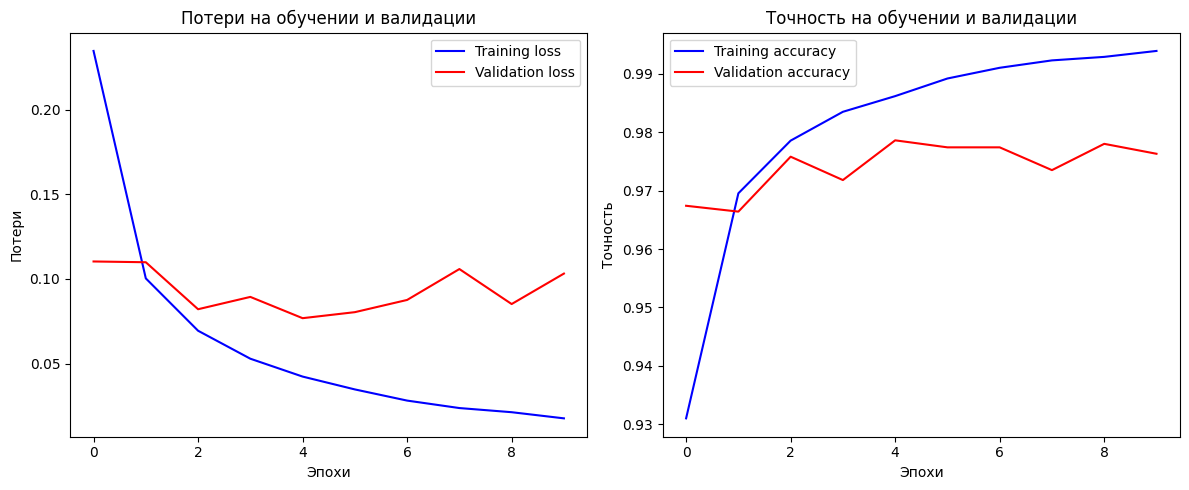

In [ ]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Потери на обучении и валидации')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Точность на обучении и валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

7. Визуализация ошибок классификации

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


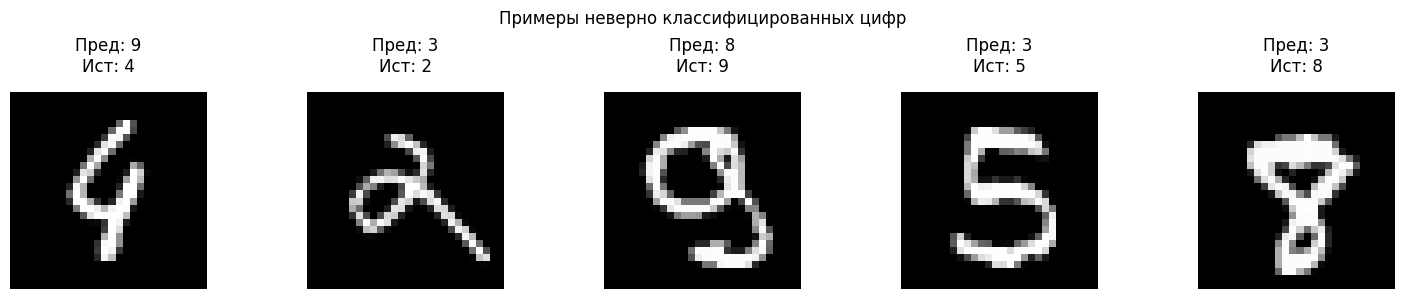

In [ ]:

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)


misclassified_idx = np.where(predicted_classes != true_classes)[0]


plt.figure(figsize=(15, 3))
for i, idx in enumerate(misclassified_idx[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Пред: {predicted_classes[idx]}\nИст: {true_classes[idx]}', pad=15)
    plt.axis('off')
plt.suptitle('Примеры неверно классифицированных цифр')
plt.tight_layout()
plt.show()

# Часть 2

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.4 MB/s eta 0:00:00


Trial 5 Complete [00h 00m 37s]
val_accuracy: 0.8378999829292297

Best val_accuracy So Far: 0.8432999849319458
Total elapsed time: 00h 02m 04s

Лучшие архитектурные параметры:
Функция активации: tanh
Размер первого скрытого слоя: 256
Размер второго скрытого слоя: 128
Оптимизатор: adam
Размер мини-выборки: 32

Подбор оптимального количества эпох:
Обучение с epochs=5
Обучение с epochs=10
Обучение с epochs=15
Обучение с epochs=20

Лучшее количество эпох: 10
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7964 - loss: 0.5627 - val_accuracy: 0.8531 - val_loss: 0.4010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8643 - loss: 0.3687 - val_accuracy: 0.8602 - val_loss: 0.3863
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8754 - loss: 0.3352 - val_accuracy: 0.8454 - val_loss: 0.4123
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8863 - loss: 0.3074 - val_accuracy: 0.8643 - val_loss: 0.3729
Epoch 5/10
1875/1

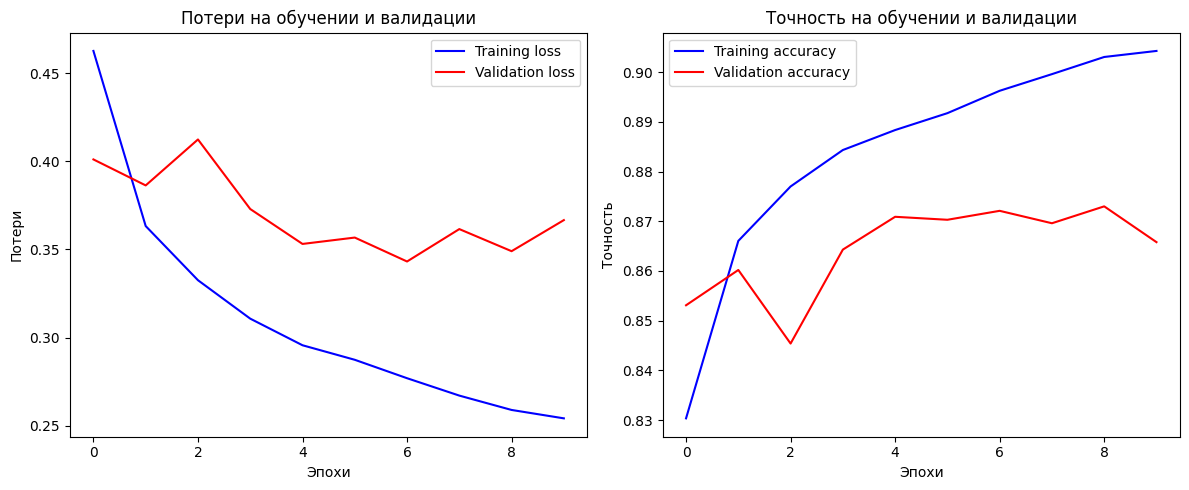

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


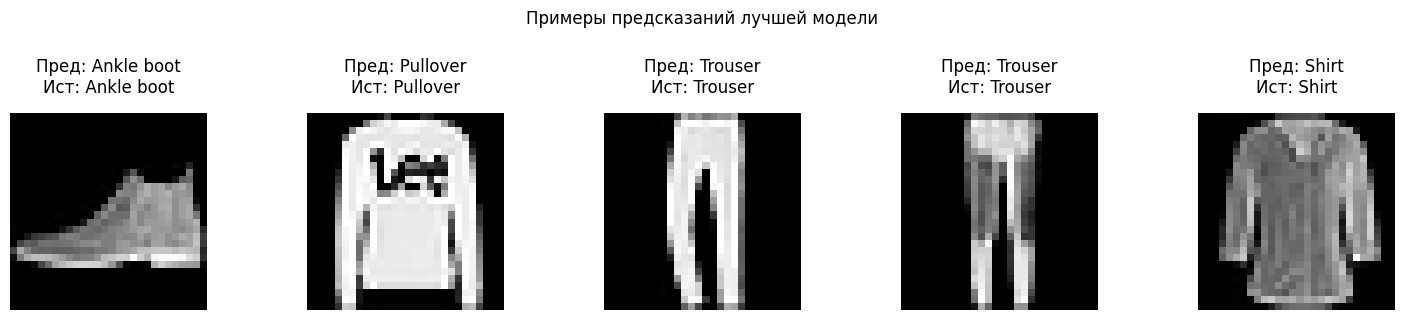

In [ ]:
!pip install keras-tuner

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import keras_tuner as kt
from sklearn.metrics import recall_score


#загрузка датасета Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#yормализация данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

#преобразование меток в one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#создание подмножества данных для подбора гиперпараметров (20% от обучающего набора)
x_train_subset, _, y_train_subset, _ = train_test_split(
    x_train, y_train, train_size=0.2, random_state=42, stratify=np.argmax(y_train, axis=1)
)

#функция для создания модели с гиперпараметрами
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(784,)))

    #выбор размеров скрытых слоев
    hidden1_size = hp.Choice('hidden1_size', values=[128, 256, 512])
    hidden2_size = hp.Choice('hidden2_size', values=[64, 128, 256])
    #выбор функции активации
    activation = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh'])

    model.add(tf.keras.layers.Dense(hidden1_size, activation=activation))
    model.add(tf.keras.layers.Dense(hidden2_size, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    #выбор оптимизатора
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam()
    else:
        opt = tf.keras.optimizers.SGD()

    model.compile(optimizer=opt,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

#настройка Keras Tuner с BayesianOptimization
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='fashion_mnist_tuning_fast'
)

#подбор гиперпараметров с Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)


batch_size = 32
search_epochs = 5
tuner.search(
    x_train_subset, y_train_subset,
    validation_data=(x_test, y_test),
    epochs=search_epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    verbose=1
)

#получение лучших гиперпараметров
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nЛучшие архитектурные параметры:")
print(f"Функция активации: {best_hps.get('activation')}")
print(f"Размер первого скрытого слоя: {best_hps.get('hidden1_size')}")
print(f"Размер второго скрытого слоя: {best_hps.get('hidden2_size')}")
print(f"Оптимизатор: {best_hps.get('optimizer')}")
print(f"Размер мини-выборки: {batch_size}")

#подбор оптимального количества эпох для лучшей модели
epochs_list = [5, 10, 15, 20]
best_val_accuracy = 0
best_epochs = 0
best_history = None

print("\nПодбор оптимального количества эпох:")
for epochs in epochs_list:
    print(f"Обучение с epochs={epochs}")
    model = tuner.hypermodel.build(best_hps)
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, y_test),
        callbacks=[early_stopping],
        verbose=0
    )

    #оценка модели
    _, val_accuracy = model.evaluate(x_test, y_test, verbose=0)

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_epochs = epochs
        best_history = history

#финальное обучение с лучшим количеством эпох
print(f"\nЛучшее количество эпох: {best_epochs}")
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    x_train, y_train,
    epochs=best_epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=1
)

#проверяем, сколько эпох реально прошло
num_epochs_trained = len(history.history['loss'])
print(f"\nФинальное обучение завершено после {num_epochs_trained} эпох")

#оценка точности на тестовых данных
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Точность на тестовых данных: {test_accuracy:.4f}")

#вычисление F1-меры
predictions = best_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f"F1-мера на тестовых данных: {f1:.4f}")

#вычисление полноты (Recall)
recall = recall_score(true_classes, predicted_classes, average='weighted')
print(f"Полнота (Recall) на тестовых данных: {recall:.4f}")



plt.figure(figsize=(12, 5))
#график потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Потери на обучении и валидации')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

#график точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Точность на обучении и валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

#визуализация некоторых предсказаний
predictions = best_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

#вывод первых 5 изображений с предсказаниями
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Пред: {class_names[predicted_classes[i]]}\nИст: {class_names[true_classes[i]]}', pad=15)
    plt.axis('off')
plt.suptitle('Примеры предсказаний лучшей модели', y=1.05)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

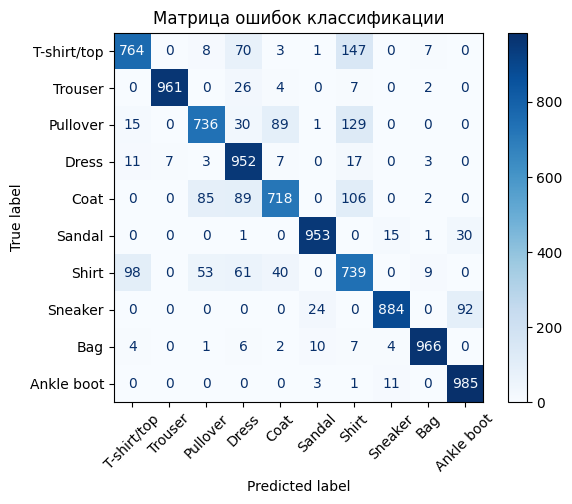

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#создание и визуализация матрицы ошибок
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Матрица ошибок классификации')
plt.grid(False)
plt.show()

Количество ошибок классификации: 1342


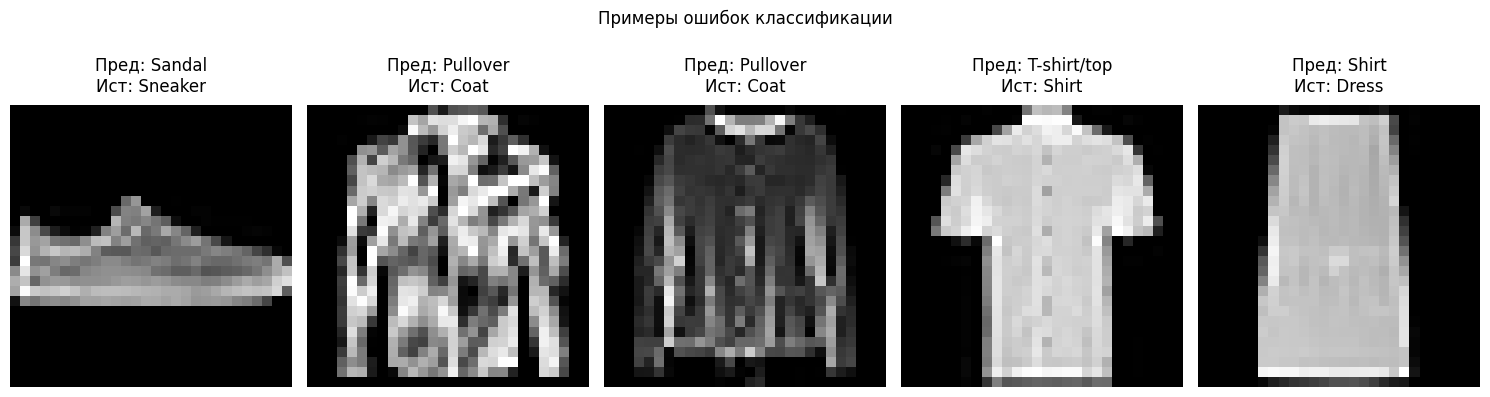

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



incorrect_indices = np.where(predicted_classes != true_classes)[0]


print(f"Количество ошибок классификации: {len(incorrect_indices)}")

#визуализация первых 5 ошибок
plt.figure(figsize=(15, 4))
for i, idx in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Пред: {class_names[predicted_classes[idx]]}\nИст: {class_names[true_classes[idx]]}", pad=10)
    plt.axis('off')

plt.suptitle("Примеры ошибок классификации", y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
pip install --upgrade tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
ERROR: Operation cancelled by user


In [ ]:
pip install keras_tuner

  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)


Trial 5 Complete [00h 00m 25s]
val_accuracy: 0.8306999802589417

Best val_accuracy So Far: 0.8314999938011169
Total elapsed time: 00h 01m 42s
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7891 - loss: 0.5929 - val_accuracy: 0.8485 - val_loss: 0.4262
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8612 - loss: 0.3712 - val_accuracy: 0.8587 - val_loss: 0.3855
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8774 - loss: 0.3326 - val_accuracy: 0.8581 - val_loss: 0.3839
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8857 - loss: 0.3064 - val_accuracy: 0.8626 - val_loss: 0.3654
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8921 - loss: 0.2885 - val_accuracy: 0.8606 - val_loss: 0.3799
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8956 - loss: 0.2814 - val_accuracy: 0.8737 - val_loss: 0.3468
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8984 - 

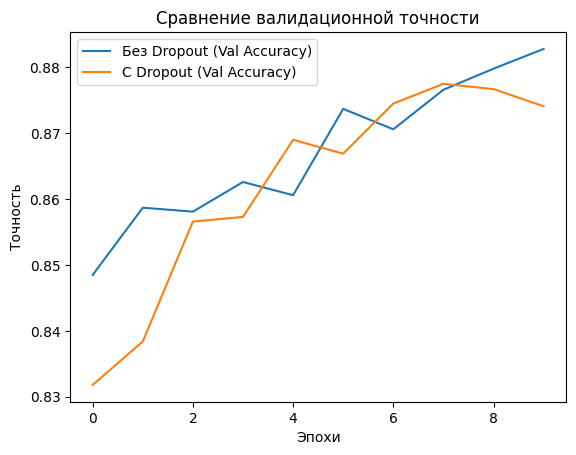

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import keras_tuner as kt

# Загрузка датасета Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Нормализация данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Преобразование изображений 28x28 в векторы длиной 784
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Преобразование меток в one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Создание подмножества данных для подбора гиперпараметров
x_train_subset, _, y_train_subset, _ = train_test_split(
    x_train, y_train, train_size=0.2, random_state=42, stratify=np.argmax(y_train, axis=1)
)

# Функция для создания модели с Dropout
def build_model(hp, use_dropout=False):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(784,)))

    hidden1_size = hp.Choice('hidden1_size', values=[128, 256, 512])
    hidden2_size = hp.Choice('hidden2_size', values=[64, 128, 256])
    activation = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh'])

    model.add(tf.keras.layers.Dense(hidden1_size, activation=activation))
    if use_dropout:
        model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(hidden2_size, activation=activation))
    if use_dropout:
        model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
    opt = tf.keras.optimizers.Adam() if optimizer == 'adam' else tf.keras.optimizers.SGD()

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Подбор гиперпараметров без Dropout
tuner_no_dropout = kt.BayesianOptimization(
    lambda hp: build_model(hp, use_dropout=False),
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='fashion_mnist_no_dropout'
)

tuner_no_dropout.search(
    x_train_subset, y_train_subset,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=32,
    verbose=1
)

# Подбор гиперпараметров с Dropout
tuner_with_dropout = kt.BayesianOptimization(
    lambda hp: build_model(hp, use_dropout=True),
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='fashion_mnist_with_dropout'
)

tuner_with_dropout.search(
    x_train_subset, y_train_subset,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=32,
    verbose=1
)

# Получение лучших гиперпараметров
best_hps_no_dropout = tuner_no_dropout.get_best_hyperparameters(num_trials=1)[0]
best_hps_with_dropout = tuner_with_dropout.get_best_hyperparameters(num_trials=1)[0]

# Обучение моделей с лучшими параметрами
model_no_dropout = build_model(best_hps_no_dropout, use_dropout=False)
history_no_dropout = model_no_dropout.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

model_with_dropout = build_model(best_hps_with_dropout, use_dropout=True)
history_with_dropout = model_with_dropout.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

# Оценка моделей
def evaluate_model(model, history, title):
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"{title} - Точность на тесте: {test_accuracy:.4f}")
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    f1 = f1_score(true_classes, predicted_classes, average='weighted')
    print(f"{title} - F1-мера: {f1:.4f}")

    plt.plot(history.history['val_accuracy'], label=f'{title} (Val Accuracy)')

evaluate_model(model_no_dropout, history_no_dropout, "Без Dropout")
evaluate_model(model_with_dropout, history_with_dropout, "С Dropout")

# Графики сравнения
plt.title("Сравнение валидационной точности")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.legend()
plt.show()


Обучение модели с активацией: relu
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Точность: 0.8884 | F1-мера: 0.8876

Обучение модели с активацией: sigmoid
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Точность: 0.8852 | F1-мера: 0.8843

Обучение модели с активацией: tanh
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Точность: 0.8795 | F1-мера: 0.8812


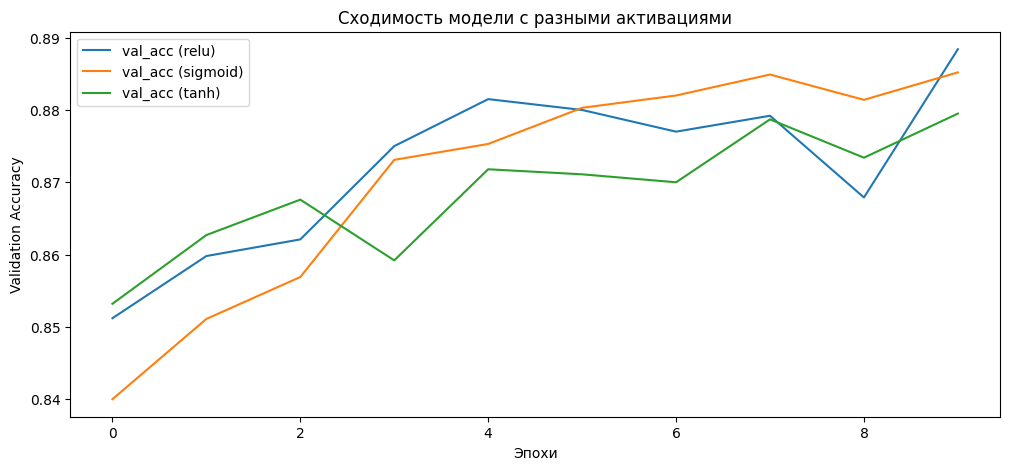


Обучение модели с скрытыми слоями 128-64

Обучение модели с скрытыми слоями 256-128

Обучение модели с скрытыми слоями 512-256


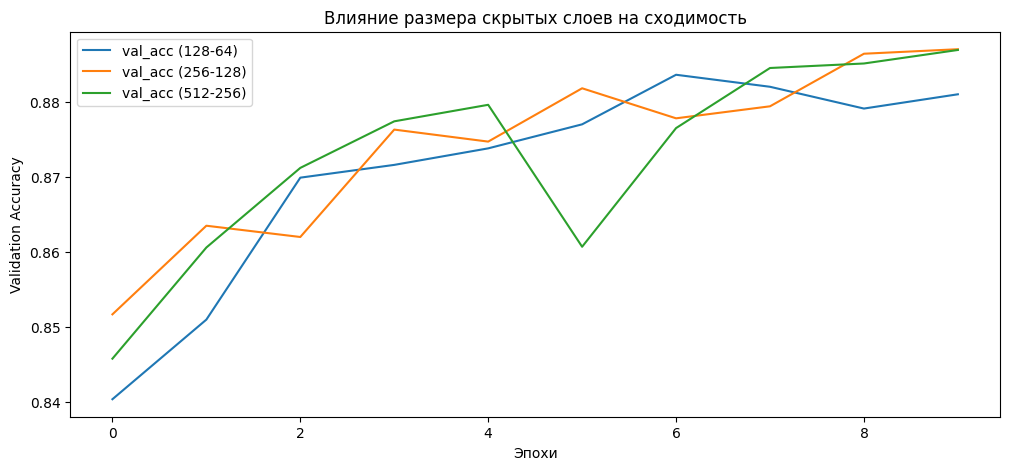

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import keras_tuner as kt

# 1. Загрузка и подготовка данных
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Нормализация
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
x_train, x_test = x_train.reshape(-1, 28 * 28), x_test.reshape(-1, 28 * 28)

# One-hot encoding
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

# 2. Функция для создания модели с разными активациями
def build_model(activation='relu'):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(784,)),
        tf.keras.layers.Dense(256, activation=activation),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 3. Обучение моделей с разными активациями и их сравнение
activations = ['relu', 'sigmoid', 'tanh']
results = {}

for activation in activations:
    print(f"\nОбучение модели с активацией: {activation}")

    model = build_model(activation)
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=0)

    # Оценка модели
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Вычисление F1-меры
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    f1 = f1_score(true_classes, predicted_classes, average='weighted')

    results[activation] = {
        'accuracy': test_accuracy,
        'f1_score': f1,
        'history': history.history
    }

    print(f"Точность: {test_accuracy:.4f} | F1-мера: {f1:.4f}")

# 4. Визуализация влияния активации на сходимость
plt.figure(figsize=(12, 5))

for activation in activations:
    plt.plot(results[activation]['history']['val_accuracy'], label=f'val_acc ({activation})')

plt.title('Сходимость модели с разными активациями')
plt.xlabel('Эпохи')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# 5. Влияние гиперпараметров (размер скрытых слоев) на сходимость
hidden_layer_sizes = [128, 256, 512]
size_results = {}

for size in hidden_layer_sizes:
    print(f"\nОбучение модели с скрытыми слоями {size}-{size//2}")

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(784,)),
        tf.keras.layers.Dense(size, activation='relu'),
        tf.keras.layers.Dense(size // 2, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=0)

    size_results[size] = history.history

# 6. Графики сходимости для разных размеров слоев
plt.figure(figsize=(12, 5))

for size in hidden_layer_sizes:
    plt.plot(size_results[size]['val_accuracy'], label=f'val_acc ({size}-{size//2})')

plt.title('Влияние размера скрытых слоев на сходимость')
plt.xlabel('Эпохи')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
